In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [8]:
def Lorentzian(x, small_gamma):
    columns = np.size(x)
    p = [0 for i in range(columns)]
    for j in range(columns):
        p[j] = 1/(1+(x[j]/small_gamma)**2)
    return p

In [9]:
def Plot_Ergodicity_Condition(MOG_energy, N, realization):
    (rows, columns) = np.shape(MOG_energy)
    mean_G_energy = [np.mean(MOG_energy[realization][:],axis = 0) for i in range(columns)]
    
    fig, axs = plt.subplots(1,2, figsize = (12,5), constrained_layout = True)
    fig.suptitle(r'CONDUCTANCE FOR N = '+str(N), fontsize = 20)
    
    axs[0].plot([(i-30) for i in range(columns)], MOG_energy[realization])
    axs[0].plot([(i-30) for i in range(columns)], mean_G_energy, color = 'red', linestyle = 'dashed')
    axs[0].set_xlabel(r'$\epsilon$', fontsize = 20)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
    axs[0].set_ylabel(r'$<G>_{steps}(\epsilon)$', fontsize = 20)
    
    axs[1].plot([i for i in range(rows)], MOG_energy[:,0])
    axs[1].plot([i for i in range(rows)], [np.mean(MOG_energy[:,0]) for i in range(rows)], color = 'red', linestyle = 'dashed')
    axs[1].set_xlabel(r'$steps$', fontsize = 20)
    axs[1].set_ylabel(r'$<G>_{\epsilon}(steps)$', fontsize = 20)
    
    for i in range(2):
        axs[i].grid(linestyle = ':')

In [10]:
def Auto_correlation(MOG_energy):
    (rows, columns) = np.shape(MOG_energy)
    geg0 = np.zeros((rows, columns))
    c = np.zeros((1, columns))
    for j in range(columns):
        geg0[:,j] = np.multiply(MOG_energy[:,j], MOG_energy[:,0])
        c[0,j] = (np.mean(geg0[:,j], axis = 0)-np.multiply(np.mean(MOG_energy[:,j], axis = 0),np.mean(MOG_energy[:,0], axis = 0)))/(np.var(MOG_energy[:,0], axis = 0))
    return c

In [11]:
list_G_1 = [None]*10
for i in range(10):
    df_G_1 = pd.read_csv(r'Energy/Energy_Channel/G_O_Gamma_N'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_1 = df_G_1.values
    list_G_1[i] = MOG_energy_1

In [12]:
MOG_energy_1 = list_G_1[0]
MOG_energy_2 = list_G_1[1]
MOG_energy_5 = list_G_1[4]
MOG_energy_10 = list_G_1[9]

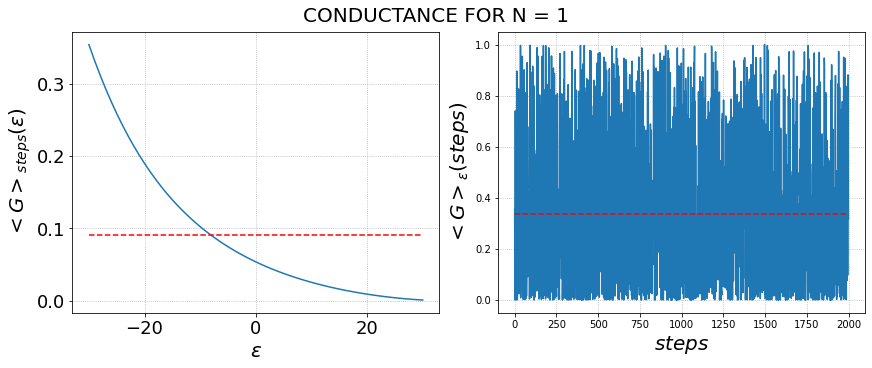

In [13]:
Plot_Ergodicity_Condition(MOG_energy_1, 1, 0)

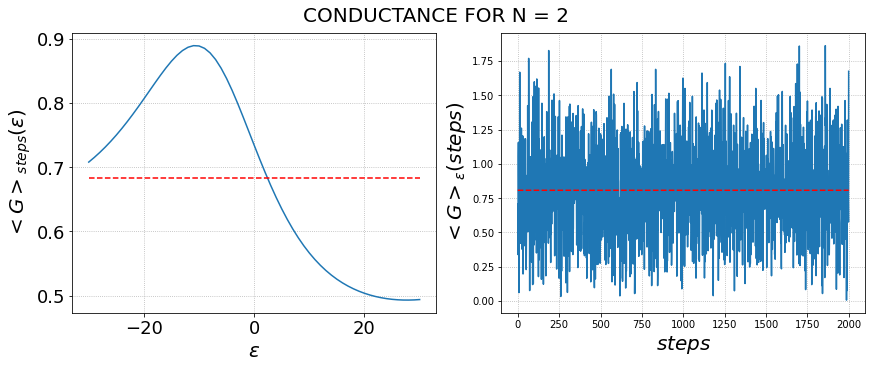

In [14]:
Plot_Ergodicity_Condition(MOG_energy_2, 2, 0)

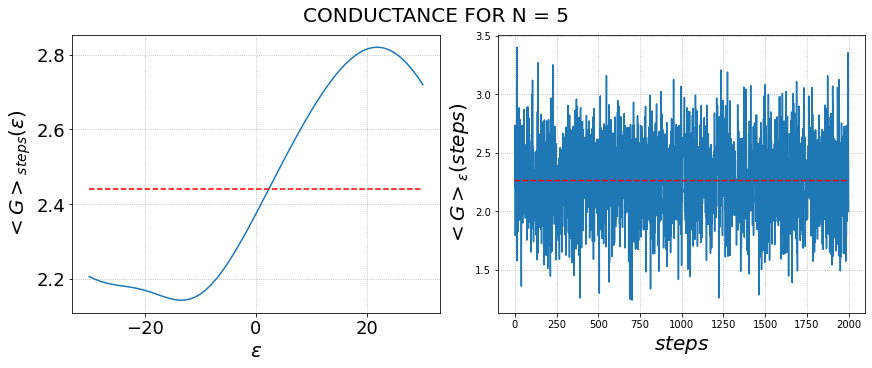

In [15]:
Plot_Ergodicity_Condition(MOG_energy_5, 5, 0)

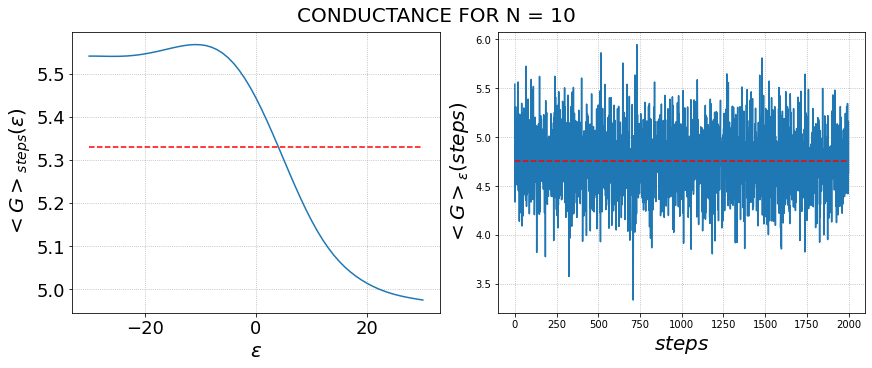

In [16]:
Plot_Ergodicity_Condition(MOG_energy_10, 10, 0)

In [17]:
c_1 = Auto_correlation(MOG_energy_1[:,0:60])
c_2 = Auto_correlation(MOG_energy_2[:,0:60])
c_5 = Auto_correlation(MOG_energy_5[:,0:60])
c_10 = Auto_correlation(MOG_energy_10[:,0:60])
#c_15 = Auto_correlation(MOG_energy_15[:,30:60])
#c_30 = Auto_correlation(MOG_energy_30[:,30:60])

In [18]:
(rows, columns) = np.shape(c_1)
x = np.zeros((1,columns))
x = [(1/20)*i for i in range(columns)]

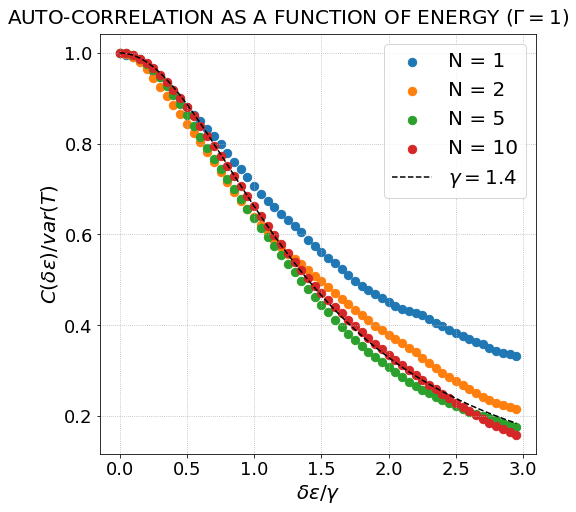

In [20]:
fig, axs = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)
fig.suptitle(r'AUTO-CORRELATION AS A FUNCTION OF ENERGY $(\Gamma = 1)$', fontsize = 20)


axs.scatter(x, c_1, s = 70, label = 'N = 1')
axs.scatter(x, c_2, s = 70, label = 'N = 2')
axs.scatter(x, c_5, s = 70, label = 'N = 5')
axs.scatter(x, c_10, s = 70, label = 'N = 10')
#axs.scatter(x, c_15, s = 70, label = 'N = 15')
#axs.scatter(x, c_30, s = 70, label = 'N = 30')

axs.plot(x, Lorentzian(x, 1.4), label = r'$\gamma = 1.4$', color = 'black', linestyle = 'dashed')

axs.set_ylabel(r'$C(\delta \epsilon) / var(T)$', fontsize = 20)
axs.set_xlabel(r'$\delta \epsilon / \gamma$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
axs.legend(fontsize = 20)
#axs.set_ylim((0,1.1))

In [21]:
def Mean_Density_of_Max(MOG_energy):
    (rows, columns) = np.shape(MOG_energy)
    max_counter = np.zeros((rows, columns))
    gamma = 1.4
    for i in range(rows):
        for j in range(1,columns-1):
            if ((MOG_energy[i,j-1] < MOG_energy[i,j]) and (MOG_energy[i,j] > MOG_energy[i,j+1])):
                max_counter[i,j] = 1
    rho = np.sum(max_counter, axis = 1)
    rho_mean = np.mean(rho)
    rho_mean_by_energy = rho_mean/((columns*0.1)/2) #interval: [0, 1.5]
    Constant_of_Proportionality = rho_mean_by_energy*gamma
    error_Constant_of_Proportionality = (np.std(rho*(gamma/(columns*0.1/2)))/np.sqrt(rows))
    return Constant_of_Proportionality, error_Constant_of_Proportionality

In [24]:
Density_max = np.zeros(10)
error_Density_max = np.zeros(10)
for i in range(10):
    Density_max[i], error_Density_max[i] = Mean_Density_of_Max(list_G_1[i][:,0:60])

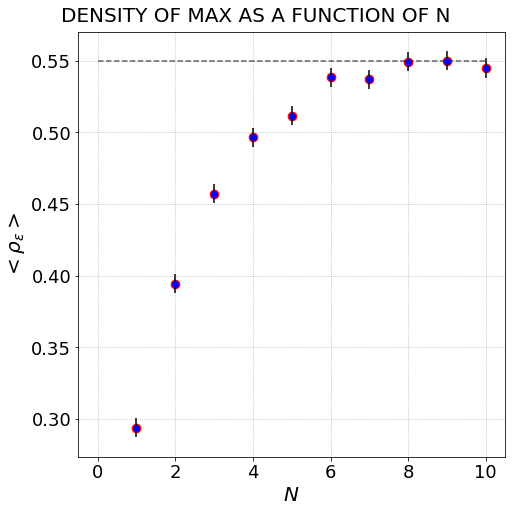

In [27]:
fig, axs = plt.subplots(1,1, figsize = (7,7), constrained_layout = True)
fig.suptitle(r'DENSITY OF MAX AS A FUNCTION OF N', fontsize = 20)

axs.plot([(i) for i in range(11)], [0.55 for i in range(11)], color = 'black', alpha = 0.6, linestyle = 'dashed')
axs.scatter([(i+1) for i in range(10)], Density_max, s = 75, color = 'red')
#axs.plot([(i+1) for i in range(10)], Density_max, color = 'black', alpha = 0.6)
axs.errorbar([(i+1) for i in range(10)], Density_max, yerr = error_Density_max[i],fmt='o',ecolor = 'black',color='blue')


axs.set_ylabel(r'$<\rho_{\epsilon}>$', fontsize = 20)
axs.set_xlabel(r'$N$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
#axs.set_ylim(0.5,1.1)
#axs.legend(fontsize = 20)